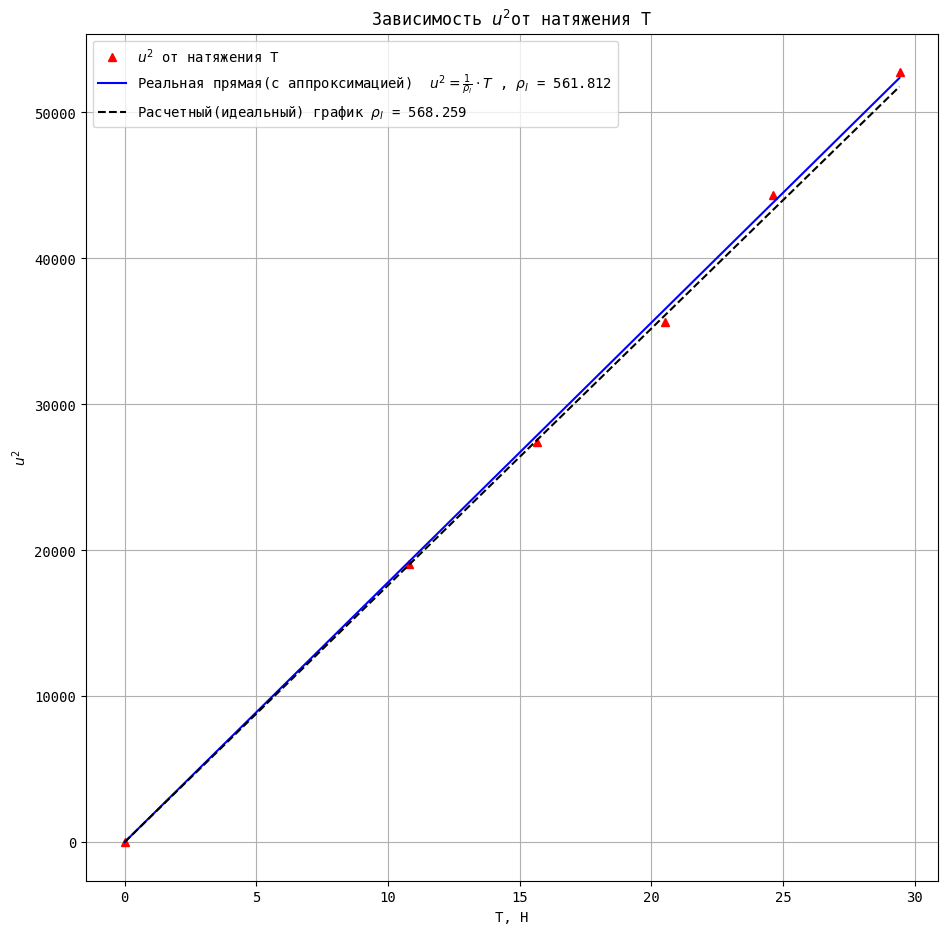

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import display, Math, Latex
import numpy as np

plt.rcParams["font.family"] = "monospace"

def mapping(x, k):
    return  x*k

plt.figure(figsize=(11,11))
plt.title(r"Зависимость " r'$u^2$' "от натяжения T")
plt.ylabel(r'$u^2$')
plt.xlabel("T, Н")

#-------------------------------------------------------------------------------------
x = []
y1 = []
y2 = []

file = open('11.txt', 'r')
while (line := file.readline()):
  s = line.split()
  if (len(s) != 0):
    x.append(float(s[2].replace(',','.')))
    y2.append(float(s[0].replace(',','.'))**2)
    y1.append(float(s[1].replace(',','.'))**2)

k1 = 0
k2 = 0

coeffs,_ = curve_fit(mapping, x, y1)
k1 = coeffs
y1_fit = []
for i in range(len(x)):
  y1_fit.append(k1 * x[i])

coeffs,_ = curve_fit(mapping, x, y2)
k2 = coeffs
y2_fit = []
for i in range(len(x)):
  y2_fit.append(k2 * x[i])
rho1 = (1/k1[0])*10**6
rho2 = (1/k2[0])*10**6
plt.plot(x, y2, 'r^', label=r'$u^2$ от натяжения T')
plt.plot(x, y2_fit, color = 'b', label = f"Реальная прямая(с аппроксимацией)  " r'$u^2 = \frac{1}{\rho_{l}} \cdot T$'' , ' r'$\rho_{l}$' f" = {rho2:.3f}")
plt.plot(x, y1_fit, color = '0', label=f"Расчетный(идеальный) график " r'$\rho_{l}$' f" = {rho1:.3f} ", linestyle='dashed')
plt.grid(visible = True, which='major', axis='both', alpha=1)
plt.grid(visible = True, which='minor', axis='both', alpha=1)
plt.legend()
plt.show()
plt.savefig('graphic.png')
file.close()